<center><h2>Projeto final de Machine Learning</h2></center>
<center><h3>Previsão de receita de filmes</h3></center>
<br />
<center>Alunos: Gabriela Caruso, Guilherme Roccato e Pedro Paulo Telho</center>



# Introdução

<p style="text-align: justify" align="justify">A indústria cinematográfica é reconhecida por suas diversas obras primas. Prêmios como Oscar, Globo de Ouro e Emmy são apenas alguns dos que recompensam os seus atores, diretores, produtores etc. Além disso, muito dinheiro é movimentado tanto em forma de investimento para a produção dos filmes como em forma de receita após o lançamento.</p>

<p style="text-align: justify" align="justify">Nesse contexto, o objetivo do projeto é prever quanto de receita um filme pode gerar para que não se tenha prejuízo durante suas produções.</p>
<p style="text-align: justify" align="justify">Para isso, será criado um modelo de regressão através da base de dados: <a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata/version/2?select=tmdb_5000_movies.csv" >TMDb 5000 movies dataset</a></p>

# Metodologia

<p style="text-align: justify" align="justify">Nessa seção será apresentada a forma em que o modelo foi construído: bibliotecas necessárias, exploração dos dados e técnicas de inferência para definição do melhor modelo de machine learning para o problema.</p>

### Importando bibliotecas necessárias

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

### Carregando os dados

In [3]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Mesclando créditos e filmes

In [5]:
credits = credits[['movie_id', 'cast', 'crew']]
credits = credits.rename(columns = {'movie_id': 'id'})
movies = pd.merge(movies,credits,on='id',how='left')


In [6]:
movies_copy = movies.copy()

In [7]:
movies_copy.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Atenção

Inicialmente excluiremos as colunas que podem ser utilizadas para a análise de textos. O objetivo é começar uma análise simplificada e ir evoluindo com o progresso do projeto.

In [8]:
count = 0
for m in movies_copy['status']:
    if m != 'Released':
        count += 1

print(count)

8


In [9]:
movies_copy = movies_copy.drop(movies_copy[movies_copy.status != 'Released'].index)

In [10]:
count = 0
for m in movies_copy['status']:
    if m != 'Released':
        count += 1

print(count)

0


In [42]:
count = 0
for m in movies_copy['revenue']:
    if m == 0:
        count += 1

print(count)

1417


In [11]:
movies_copy = movies_copy.drop(columns={'homepage', 'id', 'keywords', 'original_title', 'overview', 'production_companies', 'tagline', 'status', 'cast', 'crew'})

### Exploração de dados

In [12]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4795 non-null   int64  
 1   genres                4795 non-null   object 
 2   original_language     4795 non-null   object 
 3   popularity            4795 non-null   float64
 4   production_countries  4795 non-null   object 
 5   release_date          4794 non-null   object 
 6   revenue               4795 non-null   int64  
 7   runtime               4793 non-null   float64
 8   spoken_languages      4795 non-null   object 
 9   title                 4795 non-null   object 
 10  vote_average          4795 non-null   float64
 11  vote_count            4795 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 487.0+ KB


Como existem apenas 2 filmes sem 'runtime', ou seja, o tempo total de duração do filme, então, iremos retirar essas linhas.

In [13]:
movies_copy = movies_copy.dropna()

In [14]:
movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4792 non-null   int64  
 1   genres                4792 non-null   object 
 2   original_language     4792 non-null   object 
 3   popularity            4792 non-null   float64
 4   production_countries  4792 non-null   object 
 5   release_date          4792 non-null   object 
 6   revenue               4792 non-null   int64  
 7   runtime               4792 non-null   float64
 8   spoken_languages      4792 non-null   object 
 9   title                 4792 non-null   object 
 10  vote_average          4792 non-null   float64
 11  vote_count            4792 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 486.7+ KB


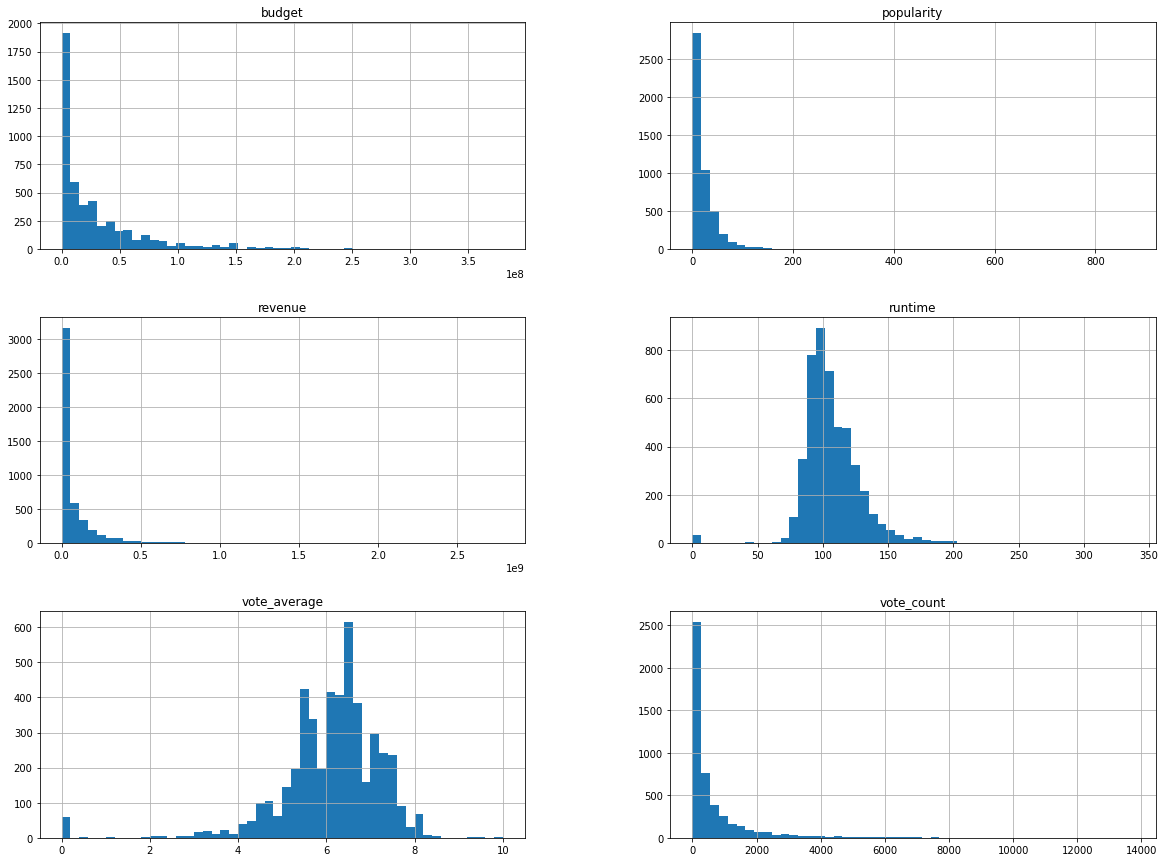

In [15]:
movies_copy.hist(bins=50, figsize=(20, 15))
plt.show()

Visualizando os histogramas acima é possível perceber que não há nenhuma anomalia com a base de dados e, portanto, é posssível continuar com a análise sem nenhuma necessidade de manipulação.

In [16]:
correlation_matrix = movies_copy.corr()

Com a matriz de correlação pode-se inferir também que a receita de cada filme tem maior correlação com a quantidade de votos (0.78)

In [17]:
correlation_matrix

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.504913,0.730646,0.269391,0.091992,0.592848
popularity,0.504913,1.000000,0.644469,0.224892,0.274898,0.777953
revenue,0.730646,0.644469,1.000000,0.251035,0.197735,0.781349
runtime,0.269391,0.224892,0.251035,1.000000,0.376450,0.271866
vote_average,0.091992,0.274898,0.197735,0.376450,1.000000,0.314647
vote_count,0.592848,0.777953,0.781349,0.271866,0.314647,1.000000


### Separação de dados treinamento/teste

Para mantermos a integridade dos dados de treinamento/teste é necessário fazer uma separação estratificada. Nesse sentido, será feita a separação pela variável vote_count.

In [18]:
movies_copy['vote_count'].max()

13752

In [19]:
movies_copy['vote_count'].min()

0

In [20]:
def stratified_shuffle(x):
    if x <= 2751:
        return 1.0
    elif x > 2751 and x <= 5502:
        return 2.0
    elif x > 5502 and x <= 8253:
        return 3.0
    elif x > 8253 and x <= 11004:
        return 4.0
    else:
        return 5.0

In [21]:
movies_copy['vote_count_cat'] = movies_copy['vote_count'].astype(int)

In [22]:
movies_copy['vote_count_cat'] = movies_copy['vote_count'].apply(stratified_shuffle)

In [23]:
movies_copy['vote_count_cat'].value_counts(True)

1.0    0.939900
2.0    0.045492
3.0    0.010643
4.0    0.003130
5.0    0.000835
Name: vote_count_cat, dtype: float64

In [24]:
movies_copy = movies_copy.reset_index()

In [25]:
# Divide, de modo estratificado, o conjunto de dados.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=RANDOM_SEED,
)
for train_index, test_index in split.split(movies_copy, movies_copy['vote_count_cat']):
    strat_train_set = movies_copy.loc[train_index]
    strat_test_set = movies_copy.loc[test_index]

Verificando se a separação estratificada foi bem sucedida:

In [26]:
strat_train_set['vote_count_cat'].value_counts(True)

1.0    0.939995
2.0    0.045395
3.0    0.010697
4.0    0.003131
5.0    0.000783
Name: vote_count_cat, dtype: float64

In [27]:
strat_test_set['vote_count_cat'].value_counts(True)

1.0    0.939520
2.0    0.045881
3.0    0.010428
4.0    0.003128
5.0    0.001043
Name: vote_count_cat, dtype: float64

In [28]:
# Remove a coluna nova, que foi adicionada apenas temporariamente.
strat_train_set.drop(['vote_count_cat'], axis=1, inplace=True)
strat_test_set.drop(['vote_count_cat'], axis=1, inplace=True)

In [29]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 2057 to 2213
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 3833 non-null   int64  
 1   budget                3833 non-null   int64  
 2   genres                3833 non-null   object 
 3   original_language     3833 non-null   object 
 4   popularity            3833 non-null   float64
 5   production_countries  3833 non-null   object 
 6   release_date          3833 non-null   object 
 7   revenue               3833 non-null   int64  
 8   runtime               3833 non-null   float64
 9   spoken_languages      3833 non-null   object 
 10  title                 3833 non-null   object 
 11  vote_average          3833 non-null   float64
 12  vote_count            3833 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 419.2+ KB


In [30]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 1803 to 4570
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 959 non-null    int64  
 1   budget                959 non-null    int64  
 2   genres                959 non-null    object 
 3   original_language     959 non-null    object 
 4   popularity            959 non-null    float64
 5   production_countries  959 non-null    object 
 6   release_date          959 non-null    object 
 7   revenue               959 non-null    int64  
 8   runtime               959 non-null    float64
 9   spoken_languages      959 non-null    object 
 10  title                 959 non-null    object 
 11  vote_average          959 non-null    float64
 12  vote_count            959 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 104.9+ KB


### Explorando melhor os dados de treinamento - Correlação entre variáveis

In [31]:
movies_train = strat_train_set.copy()

In [32]:
correlation_matrix = movies_train.corr()
correlation_matrix

,index,budget,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.757018,-0.421781,-0.520165,-0.314543,-0.115214,-0.439762
budget,-0.757018,1.000000,0.510846,0.729063,0.264141,0.089055,0.585862
popularity,-0.421781,0.510846,1.000000,0.664975,0.223455,0.278089,0.774411
revenue,-0.520165,0.729063,0.664975,1.000000,0.244248,0.192330,0.776629
runtime,-0.314543,0.264141,0.223455,0.244248,1.000000,0.374599,0.269304
vote_average,-0.115214,0.089055,0.278089,0.192330,0.374599,1.000000,0.314150
vote_count,-0.439762,0.585862,0.774411,0.776629,0.269304,0.314150,1.000000


In [33]:
movies_train.corr(method='spearman')

,index,budget,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.853516,-0.606536,-0.671099,-0.359226,-0.012022,-0.617067
budget,-0.853516,1.000000,0.647972,0.756093,0.330110,0.056542,0.663010
popularity,-0.606536,0.647972,1.000000,0.775908,0.305750,0.359281,0.959418
revenue,-0.671099,0.756093,0.775908,1.000000,0.319880,0.239623,0.802502
runtime,-0.359226,0.330110,0.305750,0.319880,1.000000,0.387964,0.306548
vote_average,-0.012022,0.056542,0.359281,0.239623,0.387964,1.000000,0.379118
vote_count,-0.617067,0.663010,0.959418,0.802502,0.306548,0.379118,1.000000


In [34]:
movies_train.corr(method='kendall')

,index,budget,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.799680,-0.436637,-0.571434,-0.264589,-0.038171,-0.445947
budget,-0.799680,1.000000,0.448985,0.463603,0.200733,0.003233,0.460595
popularity,-0.436637,0.448985,1.000000,0.475728,0.191582,0.219936,0.840365
revenue,-0.571434,0.463603,0.475728,1.000000,0.187383,0.118244,0.557155
runtime,-0.264589,0.200733,0.191582,0.187383,1.000000,0.238992,0.207364
vote_average,-0.038171,0.003233,0.219936,0.118244,0.238992,1.000000,0.262637
vote_count,-0.445947,0.460595,0.840365,0.557155,0.207364,0.262637,1.000000


In [35]:
correlation_matrix['vote_count'].sort_values(ascending=False)

vote_count      1.000000
revenue         0.776629
popularity      0.774411
budget          0.585862
vote_average    0.314150
runtime         0.269304
index          -0.439762
Name: vote_count, dtype: float64

### Preparando os dados para o modelo - Separando X e y

In [36]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 2057 to 2213
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 3833 non-null   int64  
 1   budget                3833 non-null   int64  
 2   genres                3833 non-null   object 
 3   original_language     3833 non-null   object 
 4   popularity            3833 non-null   float64
 5   production_countries  3833 non-null   object 
 6   release_date          3833 non-null   object 
 7   revenue               3833 non-null   int64  
 8   runtime               3833 non-null   float64
 9   spoken_languages      3833 non-null   object 
 10  title                 3833 non-null   object 
 11  vote_average          3833 non-null   float64
 12  vote_count            3833 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 419.2+ KB


In [37]:
strat_train_set_copy = strat_train_set.drop(columns={'genres', 'original_language', 'production_countries', 'release_date', 'spoken_languages', 'title'})
strat_train_set_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 2057 to 2213
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3833 non-null   int64  
 1   budget        3833 non-null   int64  
 2   popularity    3833 non-null   float64
 3   revenue       3833 non-null   int64  
 4   runtime       3833 non-null   float64
 5   vote_average  3833 non-null   float64
 6   vote_count    3833 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 239.6 KB


In [38]:
# Variáveis independentes: dataset original menos a coluna de valores dependentes.
movies = strat_train_set_copy.drop('vote_count', axis=1)

# Variável dependente, também chamada de label.
movies_labels = strat_train_set_copy['vote_count'].copy()

### Construindo modelos preditivos

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(movies, movies_labels)

LinearRegression()

In [40]:
strat_train_set_copy.head()

,index,budget,popularity,revenue,runtime,vote_average,vote_count
2057,2057,22000000,9.088209,12000000,121.0,7.4,98
2601,2601,0,0.722911,0,76.0,2.9,8
1897,1897,13000000,6.337063,0,98.0,4.6,82
2500,2500,16000000,7.251897,0,93.0,4.8,91
4319,4324,0,0.147886,0,97.0,6.0,9


In [41]:
# for e in movies['production_countries']:
#     print(e)